Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness
    
Дополнительно будет выложен в ЛК

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
a. Построить точечный график
b. Рассчитать коэффициенты корреляции Пирсона и Спирмена
c. Построить модель линейной регрессии
d. Рассчитать коэффициент детерминации
e. Вывести график остатков

2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
a. Разделить данные на 2 группы
b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

Краткое резюме - корреляция между жесткостью воды и смертностью есть. Но не очень сильная.
Означает ли это прямую зависимость? Нет. Сама взаимосвязь линейная, распределение близко к нормальному.Значит, имеет смысл попробовать построить регрессионную модель. 

Но, как показывают расчеты, коэффициент детерминации здесь еще меньше. То есть, считать, что данная модель позволит нам провести убедительную экстраполяцию наших вычислений нельзя. Модель явно требует улучшения, например, поиска дополнительных независимых переменных. Это особенно наглядно при разделении общего датасета на северные и южные города. Если южные города еще поддерживают первоначальную альтернативную гипотезу, то северные скорее свидетельствуют о том, что отклонять нулевую гипотезу мы не можем. Для этого у нас явно недостаточно данных. Или сама математическая модель требует пересмотра/улучшения.

Отдельный вопрос касается ячейки "2 "Юг" - модель линейной регрессии" - здесь модель построилась совсем мимо... Причем непонятно отчего так вышло. Вероятно, что-то не то было сделано в рамках sklearn... Подскажите, пожалуйста, в чем может быть причина? 

Также не совсем очевидна польза от графиков остатков. Какой практический смысл выводить их отдельно?


In [1]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
water = pd.read_csv('water.csv')
water

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


1a Построить точечный график 

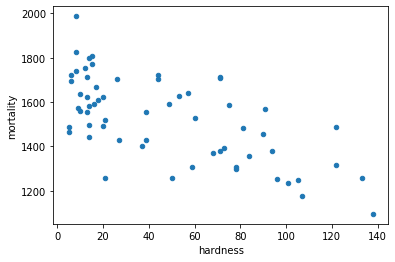

In [3]:
water.plot(kind='scatter', x='hardness', y='mortality')

1b. Рассчитать коэффициенты корреляции Пирсона и Спирмена + Кенделла

In [4]:
water[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [5]:
water[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [6]:
water[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


1c. Построить модель линейной регрессии

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = water[['hardness' ]]
y = water['mortality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
X_train.shape

(42, 1)

In [11]:
y_train.shape

(42,)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.coef_

array([-3.13167087])

In [14]:
model.intercept_

1668.9722977277095

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

 1d. Рассчитать коэффициент детерминации

In [16]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

1 - модель линейной регрессии

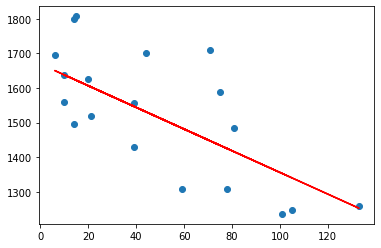

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

1e. Вывести график остатков

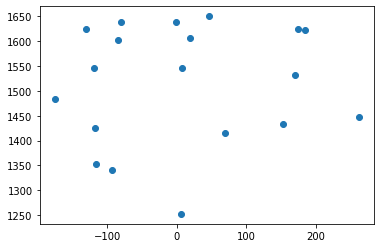

In [19]:
residuals = y_test-y_pred

plt.scatter(residuals,y_pred)

plt.show()

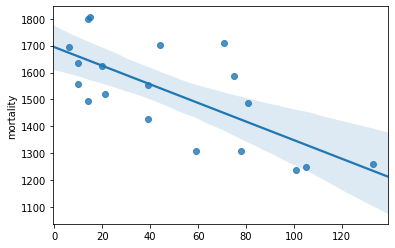

In [21]:
sns.regplot(X_test, y_test)

2a. Разделить данные на 2 группы

2b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [21]:
# Группа "Север"

water_n = water[water['location']=='North']
water_n

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


2a. "Север" Построить точечный график

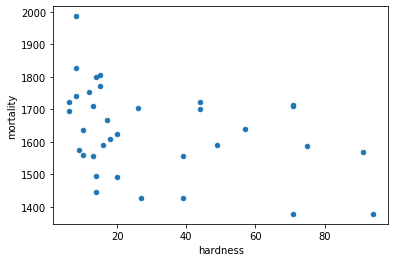

In [22]:
water_n.plot(kind='scatter', x='hardness', y='mortality')

2b. "Север" Рассчитать коэффициенты корреляции Пирсона и Спирмена + Кенделла

In [23]:
water_n[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [24]:
water_n[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [25]:
water_n[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


2с. "Север" Построить модель линейной регрессии

In [26]:
X_n = water_n[['hardness']]
y_n = water_n['mortality']

In [27]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.30, random_state=42)

In [28]:
X_train_n.shape

(24, 1)

In [29]:
y_train_n.shape

(24,)

In [30]:
model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
model_n.coef_

array([-1.97686226])

In [32]:
model_n.intercept_

1688.150229031281

In [33]:
y_pred_n = model.predict(X_test_n)
y_pred_n

array([1643.91893075, 1640.78725988, 1625.12890552, 1650.18227249,
       1618.86556377, 1446.62366581, 1531.17877935, 1643.91893075,
       1546.83713371, 1621.99723465, 1546.83713371])

2d. "Север"  Рассчитать коэффициент детерминации

In [34]:
model_n.score(X_test_n, y_test_n) # метод возвращает значение коэффициента детерминаци

0.018885304285745863

2 "Север" - модель линейной регрессии

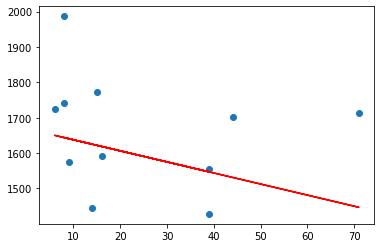

In [35]:
plt.scatter(X_test_n, y_test_n)
plt.plot(X_test_n, y_pred_n, c='r')

2e."Север"  Вывести график остатков

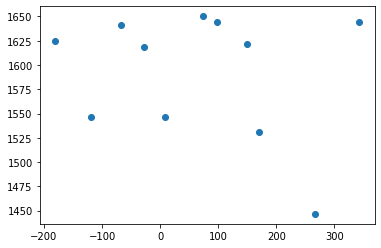

In [36]:
residuals_n = y_test_n-y_pred_n

plt.scatter(residuals_n,y_pred_n)

plt.show()

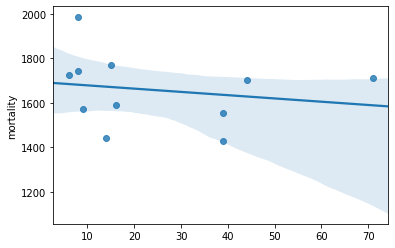

In [37]:
sns.regplot(X_test_n, y_test_n)

In [38]:
# Группа "Юг"

water_s = water[water['location']=='South']
water_s

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


2a. "Юг" Построить точечный график

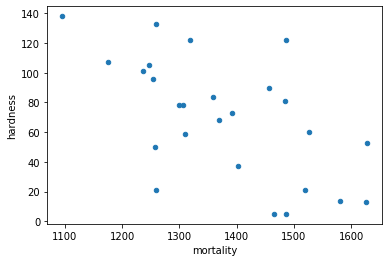

In [39]:
water_s.plot(kind='scatter', x='mortality', y='hardness')

2b. "Юг" Рассчитать коэффициенты корреляции Пирсона и Спирмена + Кенделла

In [40]:
water_s[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [41]:
water_s[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [42]:
water_s[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


2с. "Юг" Построить модель линейной регрессии

In [43]:
X_s = water_s[['mortality']]
y_s = water_s['hardness']

In [44]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.30, random_state=42)

In [45]:
X_train_s.shape

(18, 1)

In [46]:
y_train_s.shape

(18,)

In [47]:
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
model_s.coef_

array([-0.18112812])

In [49]:
model_s.intercept_

324.11907462359864

In [50]:
y_pred_s = model.predict(X_test_s)
y_pred_s

array([-2458.56991175, -2984.69061827, -2236.22127983, -2984.69061827,
       -2721.63026501, -2276.93300117, -2430.3848739 , -2922.05720083])

2d. "Юг" Рассчитать коэффициент детерминации

In [51]:
model_s.score(X_test_s, y_test_s) # метод возвращает значение коэффициента детерминации

-0.05226615794483824

2 "Юг" - модель линейной регрессии

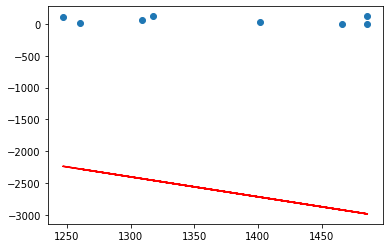

In [52]:
plt.scatter(X_test_s, y_test_s)
plt.plot(X_test_s, y_pred_s, c='r')


2e. "Юг" Вывести график остатков

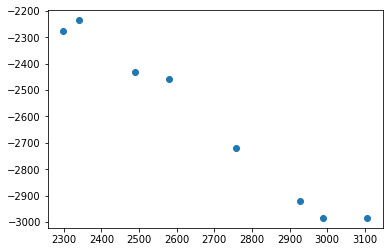

In [53]:
residuals_s = y_test_s - y_pred_s

plt.scatter(residuals_s,y_pred_s)

plt.show()

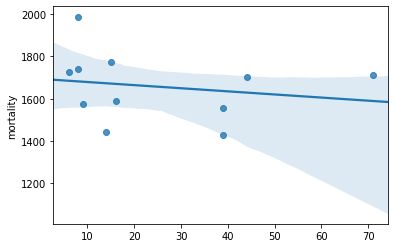

In [54]:
sns.regplot(X_test_n, y_test_n)